In [1]:
from modules.general.F_search import *
from modules.graph.hist1D import *

import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
import re

# Create general h5 for all data
INPUT = "/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon/DarkSUSY.h5"

# Si existe el archivo OUTPUT ACTUALIZARLO #
if os.path.exists(INPUT):
    hf = h5py.File(INPUT, 'r')
else:
    print(" :: Datos de entrada inexistentes:: ")
    sys.exit()

# code to find
# var


Phi_CMS_all = None
Phi_HL_all = None

INPUT_CMS = None
INPUT_HL = None

# prueba
for MNeuL in hf.keys():
    # print(MNeuL)
    MNeuD_all = hf.require_group(MNeuL)
    for MNeuD in MNeuD_all.keys():
        # print(MNeuL + "/" + MNeuD)
        MPhoD_all = hf.require_group(MNeuL + "/" + MNeuD)
        for MPhoD in MPhoD_all.keys():
            # print(MNeuL + "/" + MNeuD + "/" + MPhoD)
            TcPhoD_all = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD)
            for TcPhoD in TcPhoD_all.keys():
                # print(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD)
                Data_Card = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD)
                for Card in Data_Card.keys():
                    # Identifiacion del archivo en Name_of_FileROOT
                    # print(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD + "/" + Card)
                    FileROOT = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + "/" + TcPhoD + "/" + Card)
                    if np.array(FileROOT.get("Verification")) is "OFF" or \
                            np.array(FileROOT.get("Mu_Entries")).shape[0] < 100:  # Mal Introducida Data
                        continue

                    name = str(np.array(FileROOT.get("Name_of_FileROOT")))
                    # print(name)
                    Values = Ob_Value(name)
                    INPUT_VAR = [float(Values["MNeuL"]), float(Values["MNeuD"]),
                                 float(Values["MPhoD"]), float(Values["TcPhoD"])]
                    # print(INPUT_VAR)

                    # var in the respective root
                    Phi = np.array(FileROOT.get("Phi"))
                    # Phi = np.array(FileROOT.get("Phi"))
                    # Phi = np.array(FileROOT.get("Phi"))
                    # D0 = np.array(FileROOT.get("D0"))
                    # DZ = np.array(FileROOT.get("DZ"))
                    # T = np.array(FileROOT.get("T"))
                    # Charge = np.array(FileROOT.get("Charge"))
                    # MassInv = np.array(FileROOT.get("MassInv"))
                    # InsolationVar = np.array(FileROOT.get("InsolationVar"))
                    diMu_Entries = np.array(FileROOT.get("diMu_Entries"))
                    # Particles = diMu_Entries[:, 1:5]  # position of particles

                    if Phi.shape is ():  # caso cuando no se tienen datos
                        continue

                    if Values["Card"] is "_CMS_":
                        if Phi_CMS_all is None:
                            Phi_CMS_all = Phi.reshape((1, Phi.shape[0] * Phi.shape[1]))
                            Phi_CMS_0 = Phi[diMu_Entries[:, 1:5] == 0]
                            Phi_CMS_1 = Phi[diMu_Entries[:, 1:5] == 1]
                            Phi_CMS_2 = Phi[diMu_Entries[:, 1:5] == 2]
                            Phi_CMS_3 = Phi[diMu_Entries[:, 1:5] == 3]
                            # Phi_CMS_all = Phi
                            # Phi_CMS_all = Phi
                            # D0_CMS_all = D0
                            # DZ_CMS_all = DZ
                            # T_CMS_all = T
                            # Charge_CMS_all = Charge
                            # MassInv_CMS_all = MassInv
                            # InsolationVar_CMS_all = InsolationVar
                        else:
                            Phi_CMS_all = np.hstack((Phi_CMS_all, Phi.reshape((1, Phi.shape[0] * Phi.shape[1]))))
                            Phi_CMS_0 = np.hstack((Phi_CMS_0, Phi[diMu_Entries[:, 1:5] == 0]))
                            Phi_CMS_1 = np.hstack((Phi_CMS_1, Phi[diMu_Entries[:, 1:5] == 1]))
                            Phi_CMS_2 = np.hstack((Phi_CMS_2, Phi[diMu_Entries[:, 1:5] == 2]))
                            Phi_CMS_3 = np.hstack((Phi_CMS_3, Phi[diMu_Entries[:, 1:5] == 3]))
                    elif Values["Card"] is "_HL_":
                        if Phi_HL_all is None:
                            Phi_HL_all = Phi.reshape((1, Phi.shape[0] * Phi.shape[1]))
                            Phi_HL_0 = Phi[diMu_Entries[:, 1:5] == 0]
                            Phi_HL_1 = Phi[diMu_Entries[:, 1:5] == 1]
                            Phi_HL_2 = Phi[diMu_Entries[:, 1:5] == 2]
                            Phi_HL_3 = Phi[diMu_Entries[:, 1:5] == 3]
                        else:
                            Phi_HL_all = np.hstack((Phi_HL_all, Phi.reshape((1, Phi.shape[0] * Phi.shape[1]))))
                            Phi_HL_0 = np.hstack((Phi_HL_0, Phi[diMu_Entries[:, 1:5] == 0]))
                            Phi_HL_1 = np.hstack((Phi_HL_1, Phi[diMu_Entries[:, 1:5] == 1]))
                            Phi_HL_2 = np.hstack((Phi_HL_2, Phi[diMu_Entries[:, 1:5] == 2]))
                            Phi_HL_3 = np.hstack((Phi_HL_3, Phi[diMu_Entries[:, 1:5] == 3]))
                    else:
                        print(":: PROBLEMS :: EXIT ::")

                    # print(Phi)
                    # sys.exit()
print(INPUT_VAR)
hf.close()
# GRAFICAR

[50.0, 1.0, 5.0, 50.0]


In [66]:
# Phi_HL_all.T/3.14*180
print(np.max(centers), np.min(centers))
print(np.max(a), np.min(a))
print(np.max(radians), np.min(radians))
print(np.max(degrees), np.min(degrees))

(6.265732014659643, 0.0)
(0.005772825871014899, 0.0)
(3.141592264175415, -3.141592502593994)
(180.09127629031042, -180.09128995761748)


In [55]:
print(np.max(np.random.randint(0, 360, size=200)))
print(np.max(np.deg2rad(np.deg2rad(degrees))), np.min(np.deg2rad(np.deg2rad(degrees))))

357
(0.05485893990964961, -0.054858944072949424)


/home/franky8939/PROGRAMAS/anaconda3/envs/py27root/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


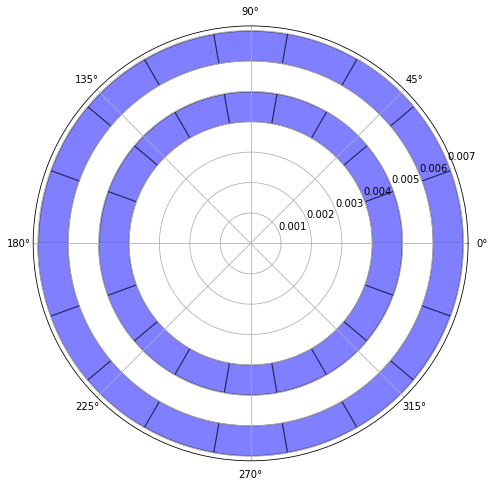

In [95]:
degrees = Phi_HL_all.T/3.14*180 + 180# np.random.randint(0, 360, size=200)
radians = Phi_HL_all.T # np.deg2rad(degrees)

bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size), normed=True)
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a/np.max(a)*0.001, width=np.deg2rad(bin_size), bottom=0.006,
       color='blue', alpha=0.5, edgecolor='black')

ax.bar(centers, a/np.max(a)*0.001, width=np.deg2rad(bin_size), bottom=0.004,
       color='blue', alpha=0.5, edgecolor='black')

#ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.002,
#       color='blue', edgecolor='black')

#ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.003,
#       color='blue', edgecolor='black')

#ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.004,
#       color='blue', edgecolor='black')
# ax.set_theta_zero_location("E")
# ax.set_theta_direction(1)
# ax.grid(False)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 4]
fig = plt.figure()
lim_y_max = 0.3
ax = fig.add_subplot(1, 3, 1)
ax.hist(Phi_HL_all.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_all.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Valores para HL", "Valores para CMS"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_title(" Todos los Valores")
ax.set_ylim(0, lim_y_max)
ax.grid(True)

ax = fig.add_subplot(1, 3, 2)
ax.hist(Phi_CMS_3.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_2.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_1.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_0.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 1", "Muon 2", "Muon 3", "Muon 4"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_title(" Valores $\phi$ de los muones " + "\n" + "para la configuracion CMS")
ax.set_ylim(0, lim_y_max)
ax.grid(True)

ax = fig.add_subplot(1, 3, 3)
ax.hist(Phi_HL_3.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_HL_2.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_HL_1.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_HL_0.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 1", "Muon 2", "Muon 3", "Muon 4"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_title(" Valores $\phi$ de los muones " + "\n" + "para la configuracion HL")
ax.set_ylim(0, lim_y_max)
ax.grid(True)

fig.savefig("Datos_Phi_ALL.pdf")
fig.savefig("Datos_Phi_ALL.png")
fig.show()



plt.rcParams['figure.figsize'] = [20, 4]
fig = plt.figure()

ax = fig.add_subplot(1, 4, 1)
ax.hist(Phi_HL_3.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_3.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 1 para HL", "Muon 1 para CMS"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_ylim(0, lim_y_max)
# ax.set_title(" Comparacion de Momentos Transversales")
ax.grid(True)

ax = fig.add_subplot(1, 4, 2)
ax.hist(Phi_HL_2.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_2.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 2 para HL", "Muon 2 para CMS"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_ylim(0, lim_y_max)
# ax.set_title(" Comparacion de Momentos Transversales")
ax.grid(True)

ax = fig.add_subplot(1, 4, 3)
ax.hist(Phi_HL_1.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_1.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 3 para HL", "Muon 3 para CMS"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_ylim(0, lim_y_max)
# ax.set_title(" Comparacion de Momentos Transversales")
ax.grid(True)

ax = fig.add_subplot(1, 4, 4)
ax.hist(Phi_HL_0.T, bins=100, alpha=0.5, normed=True)
ax.hist(Phi_CMS_0.T, bins=100, alpha=0.5, normed=True)
ax.legend(["Muon 4 para HL", "Muon 4 para CMS"])
ax.set_xlabel(" Angulo Azimutal $\phi$")
ax.set_ylabel(" Frecuencia Normalizada $f_N$")
ax.set_ylim(0, lim_y_max)
# ax.set_title(" Comparacion de Momentos Transversales")
ax.grid(True)

fig.savefig("Datos_Phi_for_Mu.pdf")
fig.savefig("Datos_Phi_for_Mu.png")
fig.show()
# hist1D(Phi_CMS_all, Phi_HL_all, bins=50, alpha=0.4, normed=True)
